In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pprint
sns.set(style="white", context='poster')
from sympy import *
import math
init_printing(use_unicode=True)
from scipy.integrate import solve_ivp

In [2]:
%load_ext autoreload
%autoreload 2


In [3]:
from model_equations_no_quota import *

In [4]:
HCOLOR = '#CC9900'
PCOLOR = '#00CC33'
DOMCOLOR = '#006699'
RDOMCOLOR = '#00334D'
DIMCOLOR = '#0099CC' #'#000066'

ccbpalette = [PCOLOR, HCOLOR, DOMCOLOR, RDOMCOLOR, DIMCOLOR]
ccborder = ['Bp', 'Bh', 'DOM', 'RDOM', 'DIM']
ccxpalette = [PCOLOR, HCOLOR]
ccxorder = ['Xp', 'Xh']
hpalette = [ HCOLOR, DOMCOLOR, RDOMCOLOR, DIMCOLOR]
horder = [ 'Bh', 'DOM', 'RDOM', 'DIM']
ppalette = [ PCOLOR, DOMCOLOR, RDOMCOLOR, DIMCOLOR]
porder = [ 'Bp', 'DOM', 'RDOM', 'DIM']
sns.color_palette(ccbpalette)

In [5]:
import os
os.listdir()


['.ipynb_checkpoints',
 'debug.xlsx',
 'draft first model run - nmol per ml.ipynb',
 'first model run-Copy1.ipynb',
 'first model run.ipynb',
 'master model notebook.ipynb',
 'model diagram.pptx',
 'model notebook osnat try1.docx',
 'model notebook sep2021 simplified no quota.docx',
 'model notebook sep2021.docx',
 'model overview.pptx',
 'model_equations.py',
 'model_equations_no_quota.py',
 'model_equations_separate_NC.py',
 'model_noquota_cc.ipynb',
 'model_noquota_honly.ipynb',
 'model_noquota_ponly.ipynb',
 'model_quota_cc.ipynb',
 'model_quota_honly.ipynb',
 'model_quota_ponly.ipynb',
 'prelim bottle.csv',
 'recycle model results 041021.pptx',
 '__pycache__',
 '~$del notebook sep2021.docx',
 '~WRL2333.tmp']

In [6]:
refdf = pd.read_csv('prelim bottle.csv')


In [7]:
for c in ['1A3', 'cc 1A3', 'cc mit9312', 'mit9312']:
    refdf[c] = refdf[c] *1e3
refdf.head()

,day,1A3,cc 1A3,cc mit9312,mit9312
0,0.000000,9.297512e+09,4.698967e+09,7.178947e+08,1.032630e+09
1,1.820833,1.469212e+10,4.648133e+09,1.753684e+09,1.641075e+09
2,4.832639,6.030062e+09,2.996029e+09,9.823158e+09,2.853167e+09
3,6.853472,4.987215e+09,2.290707e+09,2.812842e+10,1.576008e+10
4,8.779167,2.867312e+09,1.598094e+09,6.262316e+10,4.113340e+10


In [8]:
print_params()

M_h  = 1.16e-06
M_p  = 1.16e-06
gamma^D_p  = 8.00e-01
gamma^D_h  = 8.00e-01
E^O_p  = 2.31e-06
E^I_p  = 0.00e+00
E^O_h  = 0.00e+00
E^I_h  = 2.31e-06
KO_p  = 1.10e-01
KI_p  = 1.10e-01
KO_h  = 2.50e-01
KI_h  = 2.50e-01
VmaxO_p  = 0.00e+00
VmaxI_p  = 1.20e-05
VmaxO_h  = 1.10e-05
VmaxI_h  = 1.10e-06
epsilon  = 1.05e-06
VTmax  = 9.55e-07
KT_h  = 2.50e-01
omega  = 1.00e+00


dBp/dt


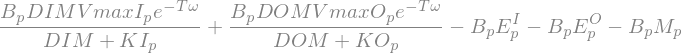

dBh/dt


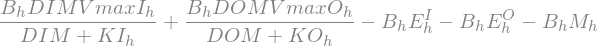

dDOM/dt


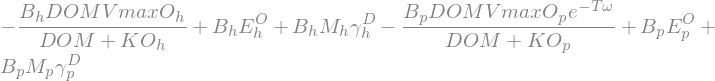

dDIM/dt


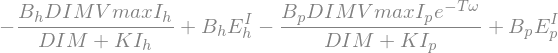

dT/dt


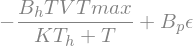

In [9]:
print_equations()


In [10]:
var_names, init_vars, calc_dydt, interm_names, intermediate_func = get_main_data()

In [11]:
print_dydt0(calc_dydt, var_names, init_vars)


dBp/dt = 9.36e-06, init Bp = 1.10e+00, newval = 1.10e+00
dBh/dt = 1.95e-03, init Bh = 2.30e+02, newval = 2.30e+02
dDOM/dt = -2.28e-03, init DOM = 2.00e+01, newval = 2.00e+01
dRDOM/dt = 5.36e-05, init RDOM = 0.00e+00, newval = 5.36e-05
dDIM/dt = 2.68e-04, init DIM = 1.00e+02, newval = 1.00e+02
dT/dt = 1.16e-06, init T = 0.00e+00, newval = 1.16e-06


In [12]:
print_intermediate0(intermediate_func, interm_names, init_vars)


Xp   = 1.00e+09
Xh   = 1.00e+10
Iuptakep = 1.32e-05
Ouptakep = 0.00e+00
Iuptakeh = 2.53e-04
Ouptakeh = 2.50e-03
deathp = 1.27e-06
deathh = 2.67e-04
exudationOp = 2.55e-06
exudationIp = 0.00e+00
exudationOh = 0.00e+00
exudationIh = 5.33e-04
Treleasep = 1.16e-06
Tbreakdownh = 0.00e+00


In [13]:
biomass_diff0(calc_dydt, init_vars)


dBp/dt + dBh/dt + dDOM/dt dRDOM/dt + dDIM/dt = -8.131516293641283e-19


In [23]:
init_vars

In [14]:
sol = run_solver(calc_dydt, init_vars)

solve_ivp(fun=calc_dydt, y0=[1.0999999999999999, 230.35139676368823, 20, 0, 100, 0],
    t_span=[0, 5356800],
    t_eval=[      0   14400   28800   43200   57600   72000   86400  100800  115200
  129600  144000  158400  172800  187200  201600  216000  230400  244800
  259200  273600  288000  302400  316800  331200  345600  360000  374400
  388800  403200  417600  432000  446400  460800  475200  489600  504000
  518400  532800  547200  561600  576000  590400  604800  619200  633600
  648000  662400  676800  691200  705600  720000  734400  748800  763200
  777600  792000  806400  820800  835200  849600  864000  878400  892800
  907200  921600  936000  950400  964800  979200  993600 1008000 1022400
 1036800 1051200 1065600 1080000 1094400 1108800 1123200 1137600 1152000
 1166400 1180800 1195200 1209600 1224000 1238400 1252800 1267200 1281600
 1296000 1310400 1324800 1339200 1353600 1368000 1382400 1396800 1411200
 1425600 1440000 1454400 1468800 1483200 1497600 1512000 1526400 1540800
 15

In [15]:
df, mdf = solver2df(sol, var_names, interm_names, intermediate_func)

In [16]:
df.head()

,Bp,Bh,DOM,RDOM,DIM,T,t,day,Xp,Xh,...,Iuptakeh,Ouptakeh,deathp,deathh,exudationOp,exudationIp,exudationOh,exudationIh,Treleasep,Tbreakdownh
0,1.100000,230.351397,20.000000,0.000000,100.000000,0.000000,0,0.000000,1.000000e+09,1.000000e+10,...,0.000253,0.002500,0.000001,0.000267,0.000003,0.0,0.0,0.000533,0.000001,0.000000
1,1.243138,245.332708,0.023471,0.810090,104.041989,0.001391,14400,0.166667,1.130125e+09,1.065037e+10,...,0.000269,0.000231,0.000001,0.000284,0.000003,0.0,0.0,0.000568,0.000001,0.000001
2,1.404848,240.324787,0.023540,1.623896,108.074326,0.001605,28800,0.333333,1.277135e+09,1.043296e+10,...,0.000264,0.000227,0.000002,0.000278,0.000003,0.0,0.0,0.000556,0.000001,0.000001
3,1.587541,235.428587,0.023619,2.421768,111.989881,0.001853,43200,0.500000,1.443219e+09,1.022041e+10,...,0.000258,0.000223,0.000002,0.000272,0.000004,0.0,0.0,0.000545,0.000002,0.000002
4,1.793920,230.642787,0.023711,3.204152,115.786828,0.002139,57600,0.666667,1.630836e+09,1.001265e+10,...,0.000253,0.000219,0.000002,0.000267,0.000004,0.0,0.0,0.000534,0.000002,0.000002


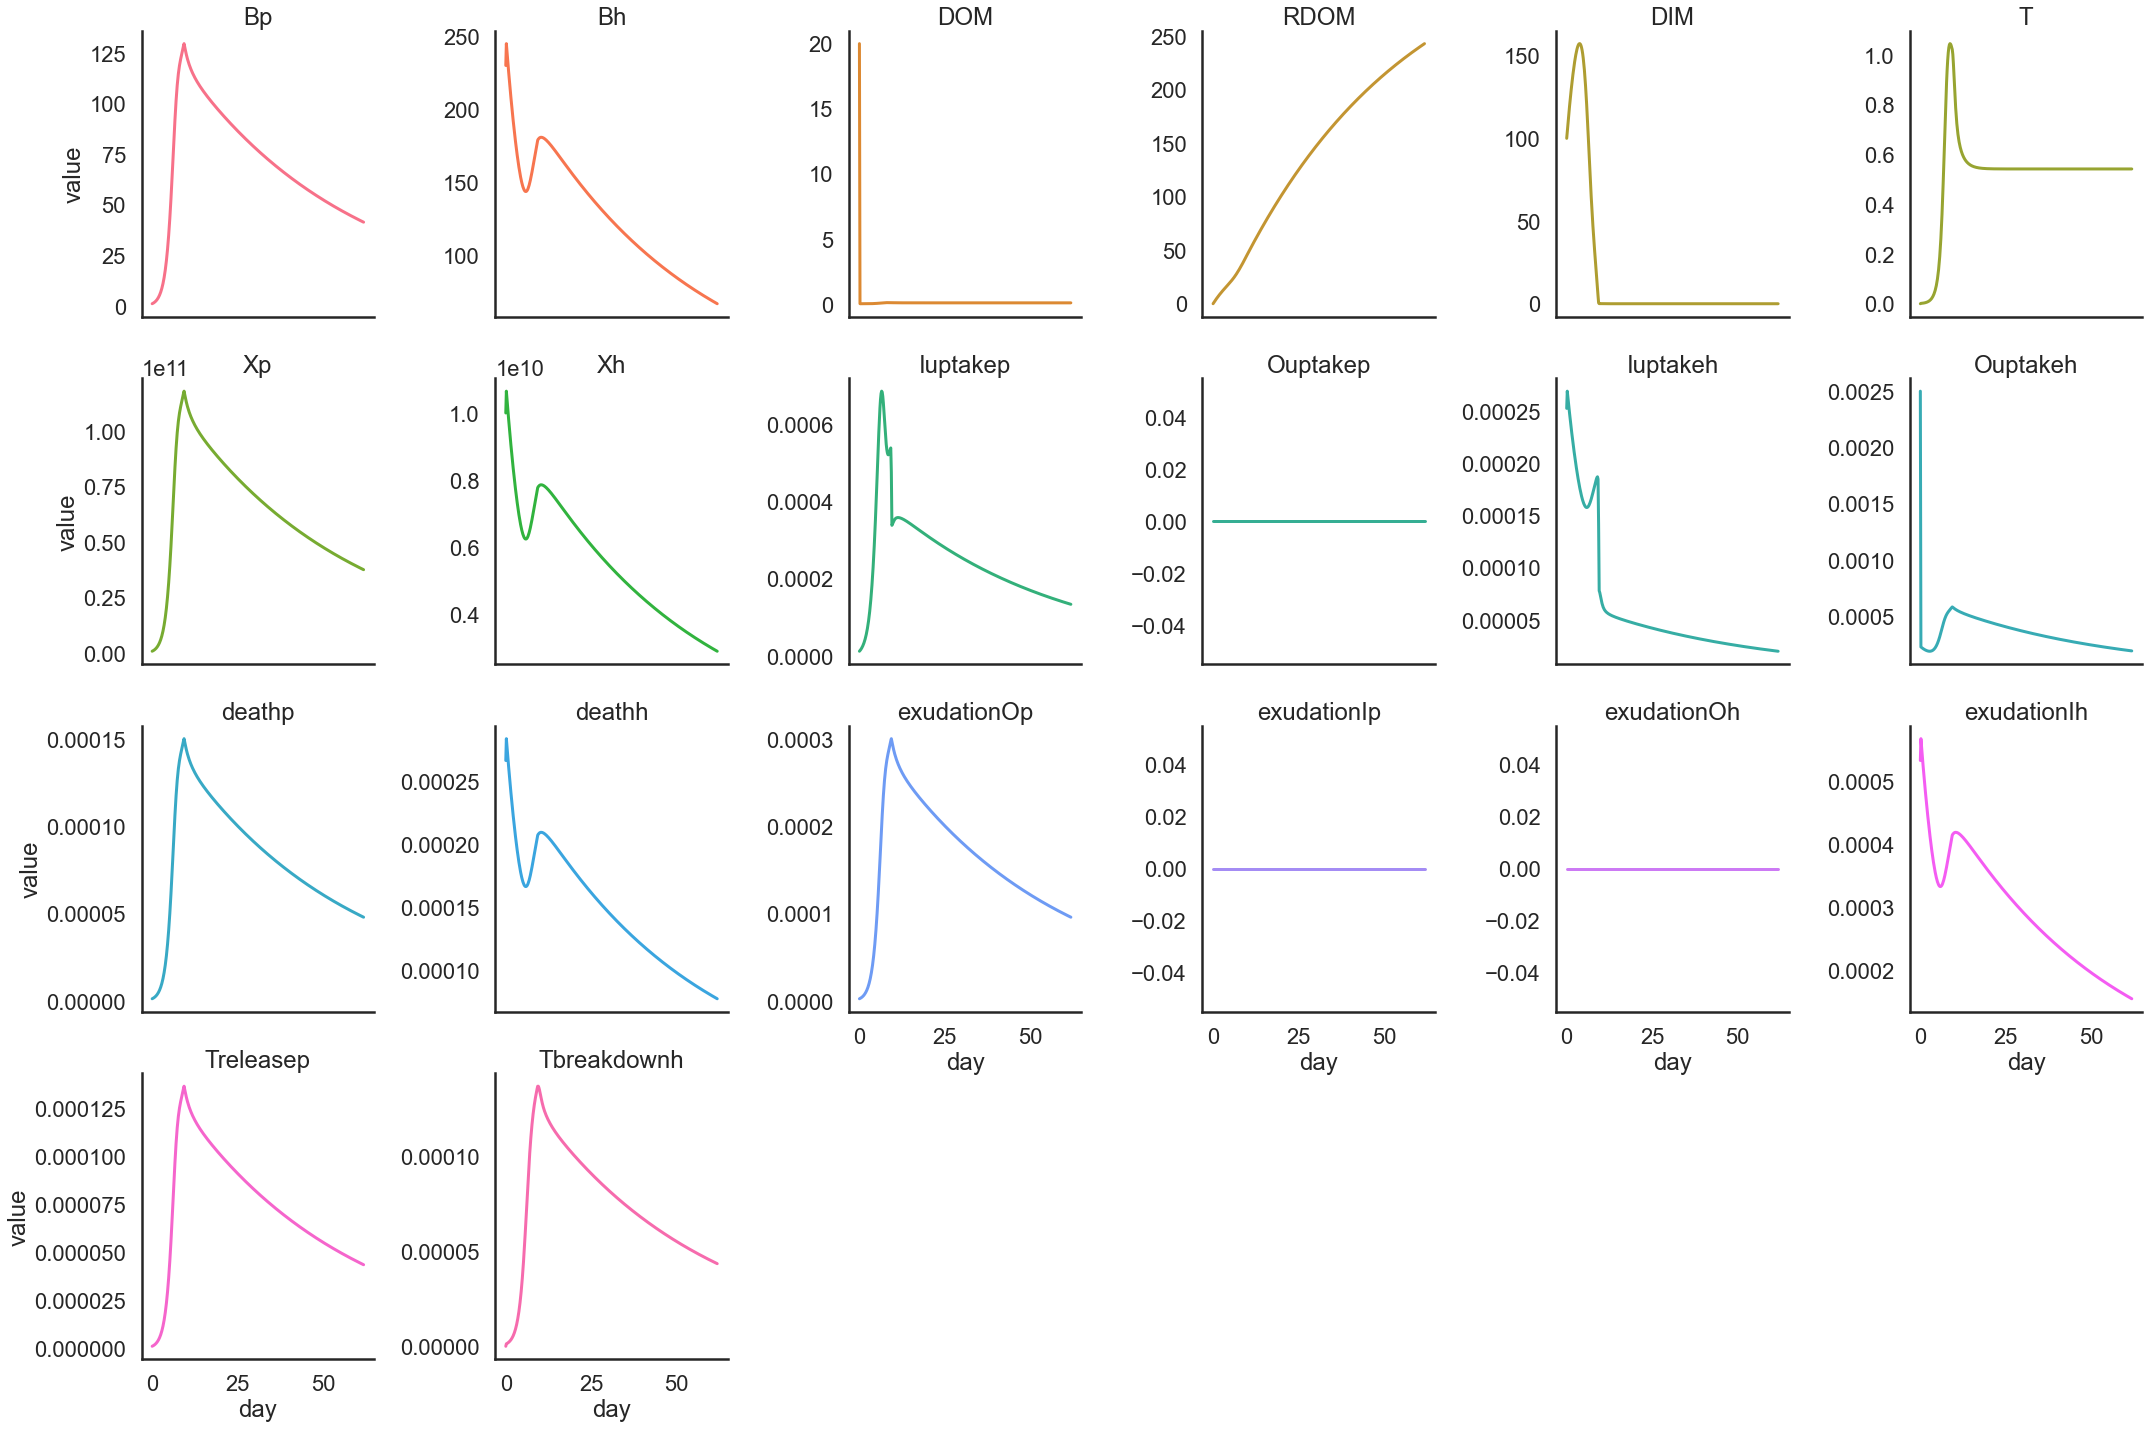

In [17]:
sns.relplot(data=mdf, x='day', y='value', hue='variable',
            kind='line', 
            col='variable', col_wrap=6, facet_kws=dict(sharey=False),
            legend=False,
           ).set_titles(row_template = '{row_name}', col_template = '{col_name}')

In [18]:
refdf.columns

Index(['day', '1A3', 'cc 1A3', 'cc mit9312', 'mit9312'], dtype='object')

<AxesSubplot:xlabel='day', ylabel='cells/l'>

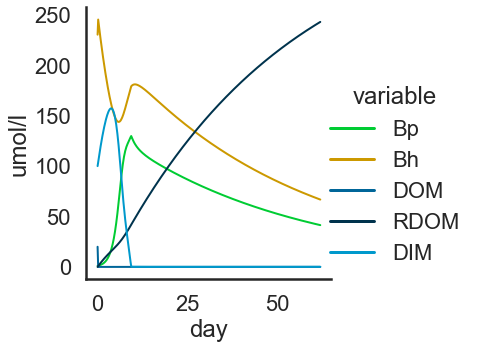

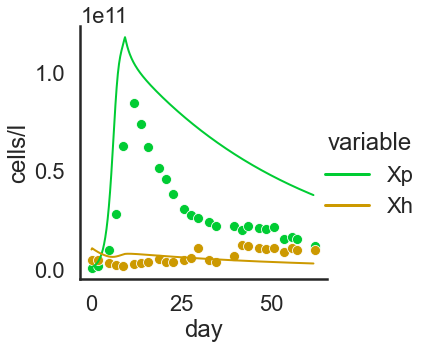

In [19]:
sns.relplot(data=mdf.loc[mdf.variable.isin(['Bp', 'Bh', 'DOM','RDOM', 'DIM',])], 
            x='day', y='value', hue='variable',
            kind='line', 
            lw=2,
            palette=ccbpalette, hue_order=ccborder,
           ).set(ylabel='umol/l')

g = sns.relplot(data=mdf.loc[mdf.variable.isin(['Xp', 'Xh'])], 
            x='day', y='value', hue='variable',
            kind='line', 
            lw=2,
            palette=ccxpalette, hue_order=ccxorder,
           ).set(ylabel='cells/l')
sns.scatterplot(data=refdf, x='day', y='cc mit9312', ax=g.ax, s=100, legend=False, color=PCOLOR)
sns.scatterplot(data=refdf, x='day', y='cc 1A3', ax=g.ax, s=100, legend=False, color=HCOLOR)


<AxesSubplot:xlabel='day', ylabel='cells/l'>

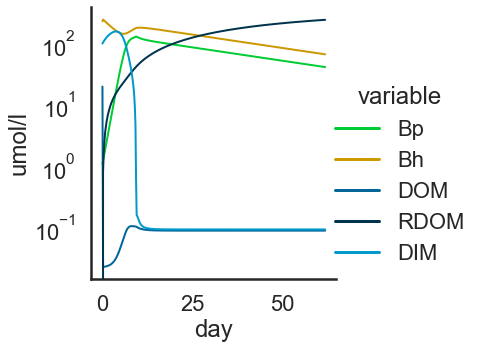

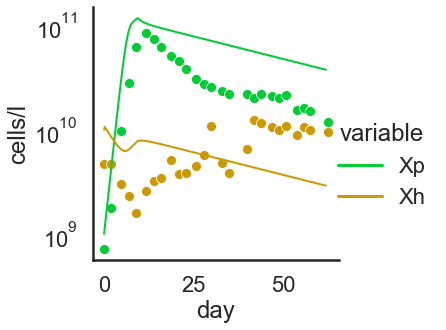

In [20]:
sns.relplot(data=mdf.loc[mdf.variable.isin(['Bp', 'Bh', 'DOM','RDOM', 'DIM',])], 
            x='day', y='value', hue='variable',
            kind='line', 
            lw=2,
            palette=ccbpalette, hue_order=ccborder,
           ).set(ylabel='umol/l', yscale='log')

g = sns.relplot(data=mdf.loc[mdf.variable.isin(['Xp', 'Xh'])], 
            x='day', y='value', hue='variable',
            kind='line', 
            lw=2,
            palette=ccxpalette, hue_order=ccxorder,
           ).set(ylabel='cells/l', yscale='log')
sns.scatterplot(data=refdf, x='day', y='cc mit9312', ax=g.ax, s=100, legend=False, color=PCOLOR)
sns.scatterplot(data=refdf, x='day', y='cc 1A3', ax=g.ax, s=100, legend=False,color=HCOLOR)


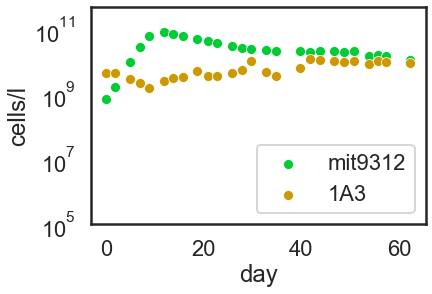

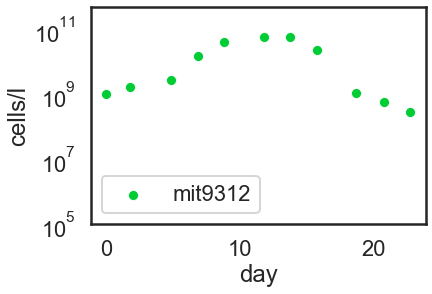

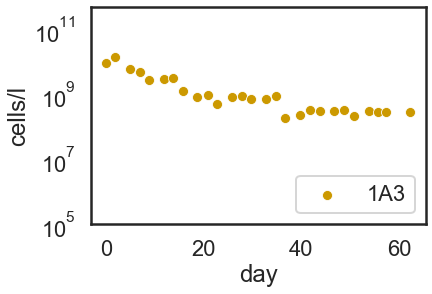

In [21]:
sns.scatterplot(data=refdf, x='day', y='cc mit9312', s=100, legend=False, color=PCOLOR, label='mit9312')
sns.scatterplot(data=refdf, x='day', y='cc 1A3',  s=100, legend=False,color=HCOLOR, label='1A3')
plt.legend(loc='lower right')
plt.ylabel('cells/l')
plt.yscale('log')
plt.ylim((1e5,5e11))
plt.show()
sns.scatterplot(data=refdf, x='day', y='mit9312', s=100, legend=False, color=PCOLOR, label='mit9312')
plt.legend()
plt.ylabel('cells/l')
plt.yscale('log')
plt.ylim((1e5,5e11))

plt.show()
sns.scatterplot(data=refdf, x='day', y='1A3',  s=100, legend=False,color=HCOLOR, label='1A3')
plt.legend(loc='lower right')
plt.ylabel('cells/l')
plt.yscale('log')
plt.ylim((1e5,5e11))
plt.show()


In [22]:
len(param_vals)